## Jack Robbins
## CMP-262
## Professor Binowski
## Project 4 - Sentiment Analysis of Tweets

Question: What is the overall sentiment of Elon Musk's most recent 500 tweets?                                                                                                                                                                              
Solution: We will discover this by pulling Elon Musk's most recent 500 tweets with the twitter API, cleaning them, and performing sentiment analysis on them.

In [19]:
# Import all needed packages
import tweepy
import geopy
import preprocessor as pre
from wordcloud import WordCloud
from IPython.display import Image
import requests
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from IPython.display import Image

In [20]:
# Get Elon Musk's tweets using the twitter V2 API
bearer_token = "############################################################################################"
client = tweepy.Client(bearer_token=bearer_token, wait_on_rate_limit=True)
elon = client.get_user(username='elonmusk',user_fields=['description', 'public_metrics'])
elon_tweets = client.get_users_tweets(id=elon.data.id, max_results=5)
# But this has a max of 99 tweets, we need a paginator object to get over 100 tweets

In [21]:
# Create a paginator object, then iterate through it to get 500 tweets
paginator = tweepy.Paginator(client.get_users_tweets, elon.data.id, max_results = 100)
elon_tweets = []
for tweet in paginator.flatten(limit=500):
    elon_tweets.append(tweet)

In [22]:
# Now extract the text out of the tweets
elon_tweet_text = []
for tweet in elon_tweets:
    elon_tweet_text.append(tweet.text)

elon_tweet_text

['Duel in the Desert.\nCouldn’t ask for a better game. Incredible play by 🇦🇷 &amp; 🇫🇷 !!!! https://t.co/XUZxjymAx0',
 '@lexfridman I agree!',
 '3 - 3 WOW!!! https://t.co/asxw78EgPn',
 'RT @FOXSoccer: ARGENTINA TAKES THE LEAD IN THE 108TH MINUTE 😱 https://t.co/vqqjaCizBP',
 '24,400 tweets per second for France’s goal, highest ever for World Cup!',
 'Well done France! 🇫🇷🇫🇷🇫🇷\nEvenly-matched game!! https://t.co/dH1CPRRno9',
 'Super exciting World Cup!\n🇦🇷 ahead 2-0 at halftime.\nCan 🇫🇷 come back?',
 '@KimDotcom 🤣',
 'Great goal by Argentina! 🇦🇷🇦🇷🇦🇷 https://t.co/WIs9ocfPcz',
 'At World Cup right now https://t.co/CG7zMMxSjE',
 'Follow The World Cup on Twitter!\nhttps://t.co/SaTzwDzBuR',
 '@EricRWeinstein Temp suspension due to prior doxxing action by this account. Will be lifted shortly.',
 '@neontaster Agreed, a high priority software update for Twitter is showing the reason for account suspension or deboosting. \n\nRules should be equally &amp; consistently applied.',
 '@KimDotcom Maybe i

In [23]:
# Now let's use the preprocessor to clean the tweets
pre.set_options(pre.OPT.URL, pre.OPT.RESERVED)
clean_tweets = []
for tweet in elon_tweet_text:
    clean_tweets.append(pre.clean(tweet))
clean_tweets

['Duel in the Desert. Couldn’t ask for a better game. Incredible play by 🇦🇷 &amp; 🇫🇷 !!!!',
 '@lexfridman I agree!',
 '3 - 3 WOW!!!',
 '@FOXSoccer: ARGENTINA TAKES THE LEAD IN THE 108TH MINUTE 😱',
 '24,400 tweets per second for France’s goal, highest ever for World Cup!',
 'Well done France! 🇫🇷🇫🇷🇫🇷 Evenly-matched game!!',
 'Super exciting World Cup! 🇦🇷 ahead 2-0 at halftime. Can 🇫🇷 come back?',
 '@KimDotcom 🤣',
 'Great goal by Argentina! 🇦🇷🇦🇷🇦🇷',
 'At World Cup right now',
 'Follow The World Cup on Twitter!',
 '@EricRWeinstein Temp suspension due to prior doxxing action by this account. Will be lifted shortly.',
 '@neontaster Agreed, a high priority software update for Twitter is showing the reason for account suspension or deboosting. Rules should be equally &amp; consistently applied.',
 '@KimDotcom Maybe it’s a coincidence 🤷\u200d♂️',
 '@BasedBeffJezos 🔥🔥🔥',
 '@MartinKulldorff @DrJBhattacharya The tide is turning fast for the Faucists',
 '@DavidSacks @mtaibbi Because they’re in on i

## Now we can begin the sentiment analysis

We will do the first sentiment analysis with the default analyzer, then with the NaiveBayesAnalyzer

In [24]:
# Let's perform sentiment analysis on all of these tweets
tweet_sentiments = {}
ratings = [0, 0, 0]
str1 = ""
myBlob = TextBlob(str1.join(clean_tweets))
for sentence in myBlob.sentences:
    rating = sentence.sentiment.polarity
    if rating > 0.2:
        ratings[0] += 1
    elif rating < -0.2:
        ratings[1] += 1
    else: 
        ratings[2] += 1
    tweet_sentiments[sentence] = sentence.sentiment

tweet_sentiments

{Sentence("Duel in the Desert."): Sentiment(polarity=0.0, subjectivity=0.0),
 Sentence("Couldn’t ask for a better game."): Sentiment(polarity=0.04999999999999999, subjectivity=0.45),
 Sentence("Incredible play by 🇦🇷 &amp; 🇫🇷 !!!!"): Sentiment(polarity=1.0, subjectivity=0.9),
 Sentence("@lexfridman I agree!3 - 3 WOW!!!"): Sentiment(polarity=0.1953125, subjectivity=1.0),
 Sentence("@FOXSoccer: ARGENTINA TAKES THE LEAD IN THE 108TH MINUTE 😱24,400 tweets per second for France’s goal, highest ever for World Cup!Well done France!"): Sentiment(polarity=0.0, subjectivity=0.0),
 Sentence("🇫🇷🇫🇷🇫🇷 Evenly-matched game!"): Sentiment(polarity=-0.5, subjectivity=0.4),
 Sentence("!Super exciting World Cup!"): Sentiment(polarity=0.35416666666666663, subjectivity=0.7333333333333334),
 Sentence("🇦🇷 ahead 2-0 at halftime."): Sentiment(polarity=0.0, subjectivity=0.0),
 Sentence("Can 🇫🇷 come back?"): Sentiment(polarity=0.0, subjectivity=0.0),
 Sentence("@KimDotcom 🤣Great goal by Argentina!"): Sentiment(pola

In [25]:
#[Positive, negative, neutral]
ratings

[68, 15, 124]

([<matplotlib.patches.Wedge at 0x7f3020bbf190>,
 [Text(0.5643939218059201, 0.944171330336043, 'positive'),
  Text(-0.7260645422013235, 0.8263354528023004, 'negative'),
  Text(-0.3367416139947748, -1.0471891354498453, 'neutral')])

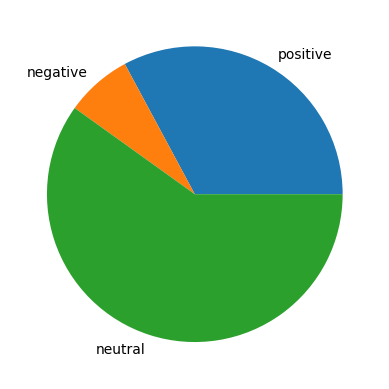

In [26]:
#Display a pie chart of the ratings
plt.pie(ratings, labels = ['positive', 'negative', 'neutral'])

In [27]:
# Here is the overall sentiment analysis of Elon Musk's last 500 tweets
myBlob.sentiment

Sentiment(polarity=0.1539240723916757, subjectivity=0.484194699922911)

In [28]:
# Let's perfrom the same analysis using the NaiveBayesAnalyzer
tweet_sentiments_NBA = {}
ratings = [0, 0, 0]
str2 = ""
myBlob2 = TextBlob(str2.join(clean_tweets), analyzer=NaiveBayesAnalyzer())
for sentence in myBlob2.sentences:
    rating_pos = sentence.sentiment.p_pos
    rating_neg = sentence.sentiment.p_neg
    if rating_pos > rating_neg:
        ratings[0] += 1
    elif rating_neg > rating_pos:
        ratings[1] += 1
    else: 
        ratings[2] += 1
    tweet_sentiments_NBA[sentence] = sentence.sentiment

tweet_sentiments_NBA

{Sentence("Duel in the Desert."): Sentiment(classification='pos', p_pos=0.6528984124561137, p_neg=0.34710158754388626),
 Sentence("Couldn’t ask for a better game."): Sentiment(classification='neg', p_pos=0.3945487961366568, p_neg=0.6054512038633432),
 Sentence("Incredible play by 🇦🇷 &amp; 🇫🇷 !!!!"): Sentiment(classification='pos', p_pos=0.6613384770211335, p_neg=0.3386615229788663),
 Sentence("@lexfridman I agree!3 - 3 WOW!!!"): Sentiment(classification='neg', p_pos=0.3166666666666664, p_neg=0.6833333333333337),
 Sentence("@FOXSoccer: ARGENTINA TAKES THE LEAD IN THE 108TH MINUTE 😱24,400 tweets per second for France’s goal, highest ever for World Cup!Well done France!"): Sentiment(classification='pos', p_pos=0.8080056336749779, p_neg=0.19199436632502428),
 Sentence("🇫🇷🇫🇷🇫🇷 Evenly-matched game!"): Sentiment(classification='pos', p_pos=0.5530303030303029, p_neg=0.4469696969696968),
 Sentence("!Super exciting World Cup!"): Sentiment(classification='pos', p_pos=0.5078603799281477, p_neg=0.4

In [29]:
#[Positive, negative, neutral]
ratings

[128, 77, 2]

([<matplotlib.patches.Wedge at 0x7f3017ec82b0>,
 [Text(-0.39965409586516065, 1.024830036473464, 'positive'),
  Text(0.36836748900293775, -1.0364870443211873, 'negative'),
  Text(1.099493299234655, -0.033383902379642505, 'neutral')])

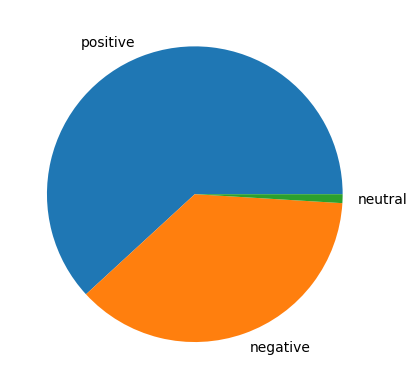

In [30]:
#Display a pie chart of the ratings
plt.pie(ratings, labels = ['positive', 'negative', 'neutral'])

In [31]:
# Here is the overall sentiment analysis of Elon Musk's last 500 tweets
myBlob2.sentiment

Sentiment(classification='pos', p_pos=1.0, p_neg=2.0194429611808214e-51)

## Comparing the two
As we can see from the pie charts, the NaiveBayesAnalyzer is much more opinionated with thinking that tweets are either positive or negative. The default analyzer tends to skew neutral, but the alternative NaiveBayesAnalyzer tends to pick a side. Both analyzers are still in agreement that there are more positive sentiments than negative ones.

## Remove stopwords before creating wordcloud

In [32]:
# Get the stopwords and set them to be english
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /home/jackr/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
# Remove the stopwords from all of the tweets
clean_tweets_noStopWords = []
for tweet in clean_tweets:
    tweet_tokens = word_tokenize(tweet)

    filtered_tweet = []
    for t in tweet_tokens:
        if t not in stop_words:
            filtered_tweet.append(t)

    clean_tweets_noStopWords.append(" ".join(filtered_tweet))

clean_tweets_noStopWords

['Duel Desert . Couldn ’ ask better game . Incredible play 🇦🇷 & amp ; 🇫🇷 ! ! ! !',
 '@ lexfridman I agree !',
 '3 - 3 WOW ! ! !',
 '@ FOXSoccer : ARGENTINA TAKES THE LEAD IN THE 108TH MINUTE 😱',
 '24,400 tweets per second France ’ goal , highest ever World Cup !',
 'Well done France ! 🇫🇷🇫🇷🇫🇷 Evenly-matched game ! !',
 'Super exciting World Cup ! 🇦🇷 ahead 2-0 halftime . Can 🇫🇷 come back ?',
 '@ KimDotcom 🤣',
 'Great goal Argentina ! 🇦🇷🇦🇷🇦🇷',
 'At World Cup right',
 'Follow The World Cup Twitter !',
 '@ EricRWeinstein Temp suspension due prior doxxing action account . Will lifted shortly .',
 '@ neontaster Agreed , high priority software update Twitter showing reason account suspension deboosting . Rules equally & amp ; consistently applied .',
 '@ KimDotcom Maybe ’ coincidence 🤷\u200d♂️',
 '@ BasedBeffJezos 🔥🔥🔥',
 '@ MartinKulldorff @ DrJBhattacharya The tide turning fast Faucists',
 '@ DavidSacks @ mtaibbi Because ’',
 '@ cb_doge @ RepAdamSchiff 🤣',
 '@ MilMileBattery @ Steam @ TheWitc

In [34]:
wordcloud = WordCloud(width = 1500, height=1000, max_words=30, background_color='grey', colormap = 'prism').generate(" ".join(clean_tweets_noStopWords))

In [35]:
wordcloud = wordcloud.to_file(filename="elon_tweets.png")

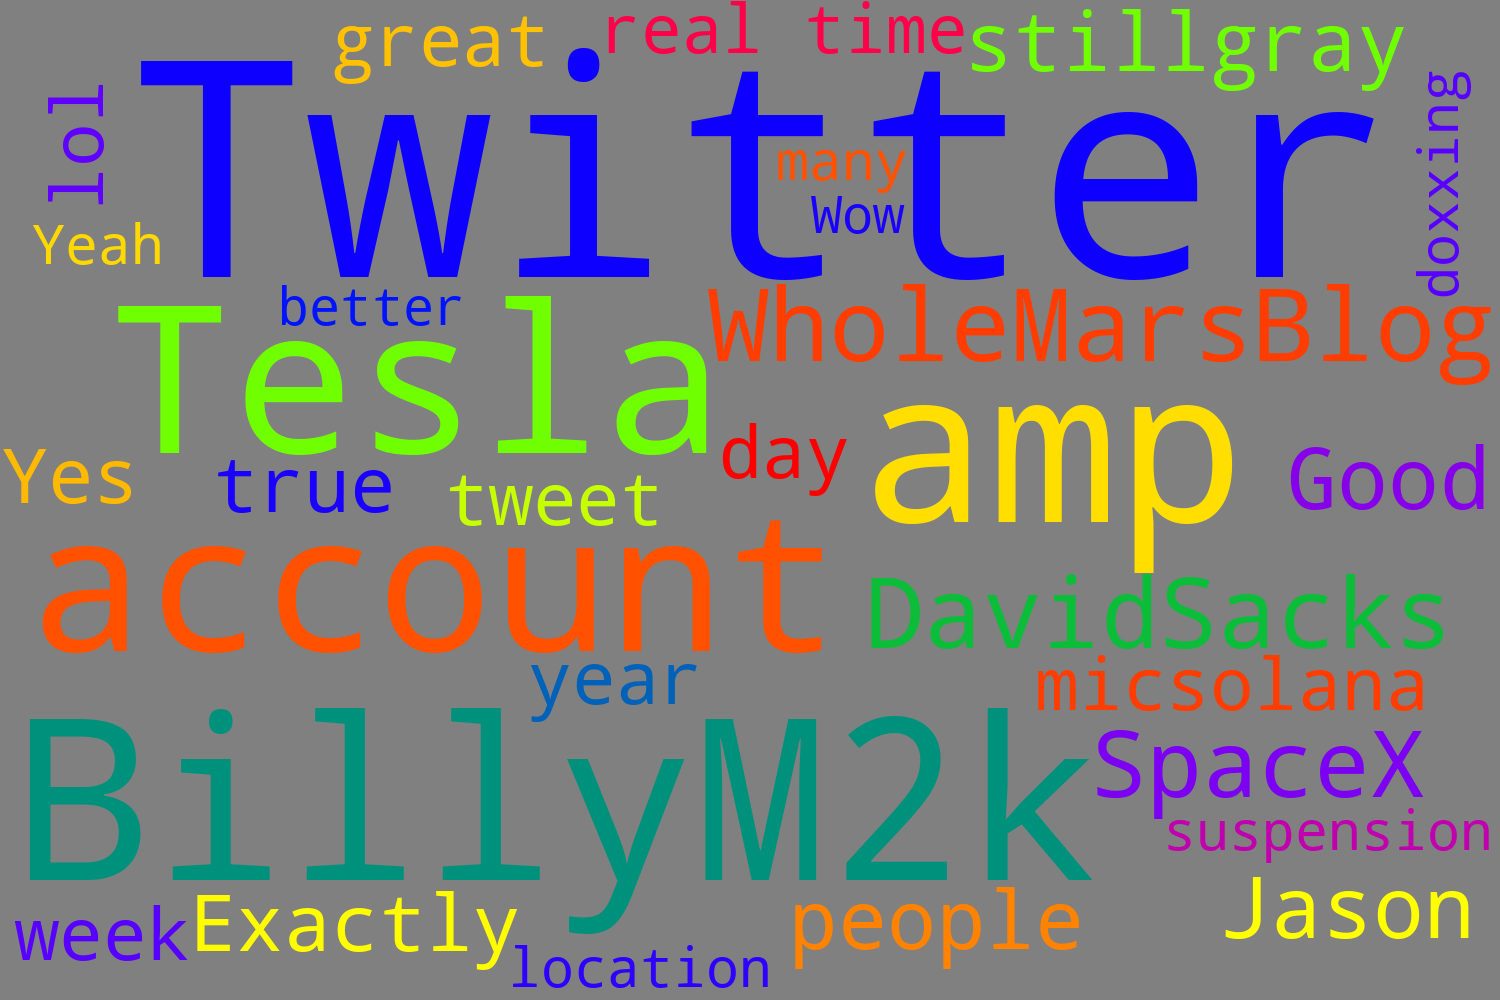

In [36]:
Image(filename="elon_tweets.png", width = 1000)

## Conclusions

In conclusion and as no surprise to anyone, the word Twitter appeared the most out of Elon Musk's last 500 tweets. This was follwoed up by Tesla, BillyM2k, and account. Additionally, both sentiment analyzers concurred that Elon Musk's tweets were more positive than they were negative, although the default analyzer had a much harder time picking a side and labeled the majority of tweets as neutral. 

The key insights from this analysis were, I think, that different sentiment analyzers can wildly change the results. I would be interested to explore this deeper and see why the NaiveBayesAnalyzer is so much more opinionated than the default one